In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
import random

# Tensorflow import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, ReLU, Softmax, BatchNormalization, Dropout
from tensorflow.random import set_seed

# **Downloading the Dataset**

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/maximvlah/grapevine-leaves",force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jocelyndumlao
Your Kaggle Key: ··········


100%|██████████| 883M/883M [00:07<00:00, 129MB/s]


In [ ]:
import os

# **Data**

In [ ]:
path = '/content/grapevine-leaves/data'
folders = os.listdir(path)
folders

['Cabernet Sauvignon',
 'Muller Thurgau',
 'Auxerrois',
 'Syrah',
 'Sauvignon Blanc',
 'Tempranillo',
 'Riesling',
 'Pinot Noir',
 'Chardonnay',
 'Cabernet Franc',
 'Merlot']

In [ ]:
listdic = []

for folder in folders:
  newpath = f'{path}/{folder}'
  folderlist =os.listdir(newpath)
  num_img = len(folderlist)
  listdic.append((folder, num_img))

listdic

[('Cabernet Sauvignon', 111),
 ('Muller Thurgau', 121),
 ('Auxerrois', 88),
 ('Syrah', 119),
 ('Sauvignon Blanc', 100),
 ('Tempranillo', 70),
 ('Riesling', 116),
 ('Pinot Noir', 59),
 ('Chardonnay', 104),
 ('Cabernet Franc', 60),
 ('Merlot', 61)]

# **Creating Folders**

--train

 * Cabernet Sauvignon
 * Sauvignon Blanc
 * Syrah
 * Auxerrois
 * Chardonnay
 * Merlot
 * Cabernet Franc
 * Pinot Noir
 * Riesling
 * Muller Thurgau
 * Tempranillo

--validation
 
 * Cabernet Sauvignon
 * Sauvignon Blanc
 * Syrah
 * Auxerrois
 * Chardonnay
 * Merlot
 * Cabernet Franc
 * Pinot Noir
 * Riesling
 * Muller Thurgau
 * Tempranillo

--test
 
 * Cabernet Sauvignon
 * Sauvignon Blanc
 * Syrah
 * Auxerrois
 * Chardonnay
 * Merlot
 * Cabernet Franc
 * Pinot Noir
 * Riesling
 * Muller Thurgau
 * Tempranillo


In [ ]:
parentdir = '/content/grapevine-leaves'

directory = ['train', 'validation', 'test']



In [ ]:
for d in directory:
  dir_path = os.path.join(parentdir, d)
  os.mkdir(dir_path)
  for f in folders:
    sub_dir_path = os.path.join(dir_path,f)
    os.mkdir(sub_dir_path)

In [ ]:
os.listdir(parentdir)

['data', 'validation', 'test', 'train']

In [ ]:
os.listdir(dir_path)

['Cabernet Sauvignon',
 'Muller Thurgau',
 'Auxerrois',
 'Syrah',
 'Sauvignon Blanc',
 'Tempranillo',
 'Riesling',
 'Pinot Noir',
 'Chardonnay',
 'Cabernet Franc',
 'Merlot']

# **Preparing Folders**

In [ ]:
import shutil

## **Renames files**

In [ ]:
for folder in folders:
  newfolder = f'{path}/{folder}'
  count = 1
  for file_name in os.listdir(newfolder):
    source = f'{newfolder}/{file_name}'
    destination = f'{newfolder}/{folder + str(count) + ".jpg"}'
    os.rename(source, destination)
    count +=1

## **Split Data train, validation,test folders**

In [ ]:
def train_num(total):
  train_factor = 0.60
  result = round(train_factor * total)
  return result

In [ ]:
def val_num(total):
  validation_factor = 0.20
  result = round(validation_factor * total)
  return result

In [ ]:
def test_num(total):
  train_val_num = train_num(total) + val_num(total)
  result = total - train_val_num
  return result

In [ ]:
for folder, value in listdic:
    counter = 0
    files_source = f'{path}/{folder}'
    for file in os.listdir(files_source):
        if counter < train_num(value):
            train_src = f'{files_source}/{file}'
            train_des = f'{parentdir}/{directory[0]}/{folder}'
            shutil.copy(train_src, train_des)
        elif train_num(value) <= counter < (train_num(value)+val_num(value)):
            val_src = f'{files_source}/{file}'
            val_des = f'{parentdir}/{directory[1]}/{folder}'
            shutil.copy(val_src, val_des)
        elif (train_num(value)+val_num(value)) <= counter <= value:
            test_src = f'{files_source}/{file}'
            test_des = f'{parentdir}/{directory[2]}/{folder}'
            shutil.copy(test_src, test_des)
        counter += 1


# **Data Preparation**


In [ ]:
train_path ='/content/grapevine-leaves/train'
valid_path = '/content/grapevine-leaves/validation'

In [ ]:
for folder in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 67 in folder Cabernet Sauvignon
For training data , found 73 in folder Muller Thurgau
For training data , found 53 in folder Auxerrois
For training data , found 71 in folder Syrah
For training data , found 60 in folder Sauvignon Blanc
For training data , found 42 in folder Tempranillo
For training data , found 70 in folder Riesling
For training data , found 35 in folder Pinot Noir
For training data , found 62 in folder Chardonnay
For training data , found 36 in folder Cabernet Franc
For training data , found 37 in folder Merlot


In [ ]:
for folder in  os.listdir(valid_path ) : 
    files = gb.glob(pathname= str( valid_path +'//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 22 in folder Cabernet Sauvignon
For testing data , found 24 in folder Muller Thurgau
For testing data , found 18 in folder Auxerrois
For testing data , found 24 in folder Syrah
For testing data , found 20 in folder Sauvignon Blanc
For testing data , found 14 in folder Tempranillo
For testing data , found 23 in folder Riesling
For testing data , found 12 in folder Pinot Noir
For testing data , found 21 in folder Chardonnay
For testing data , found 12 in folder Cabernet Franc
For testing data , found 12 in folder Merlot


In [ ]:
size = []
for folder in  os.listdir(train_path ) : 
    files = gb.glob(pathname= str( train_path +'//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(2048, 1536, 3)    305
(1772, 1772, 3)    300
(3024, 4032, 3)      1
dtype: int64

# **Exploratory Data Analysis**

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

def testAccuracy(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    predicted_categories = tf.argmax(y_pred, axis=1)
    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')
    
def plot_image(pred_array, true_label, img, class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

def predictions(model):
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    class_names = test_data.class_names
    indices = random.sample(range(len(images)), 15)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(4*num_cols, 2*num_rows))
    for i,index in enumerate(indices):
      plt.subplot(num_rows, num_cols, i+1)
      plot_image(y_pred[index], true_categories[index], images[index],class_names)
    plt.tight_layout()
    plt.show()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=5, restore_best_weights=True
)


In [ ]:
set_seed(111) # set random seed

class_dirs = os.listdir("/content/grapevine-leaves/train") # list all directories inside "train" folder

image_dict = {} # dict to store image array(key) for every class(value)

count_dict = {} # dict to store count of files(key) for every class(value)


for cls in class_dirs:
    file_paths = gb.glob(f'../content/grapevine-leaves/train/{cls}/*')
    count_dict[cls] = len(file_paths)
    image_path = random.choice(file_paths)
    image_dict[cls] = tf.keras.utils.load_img(image_path)

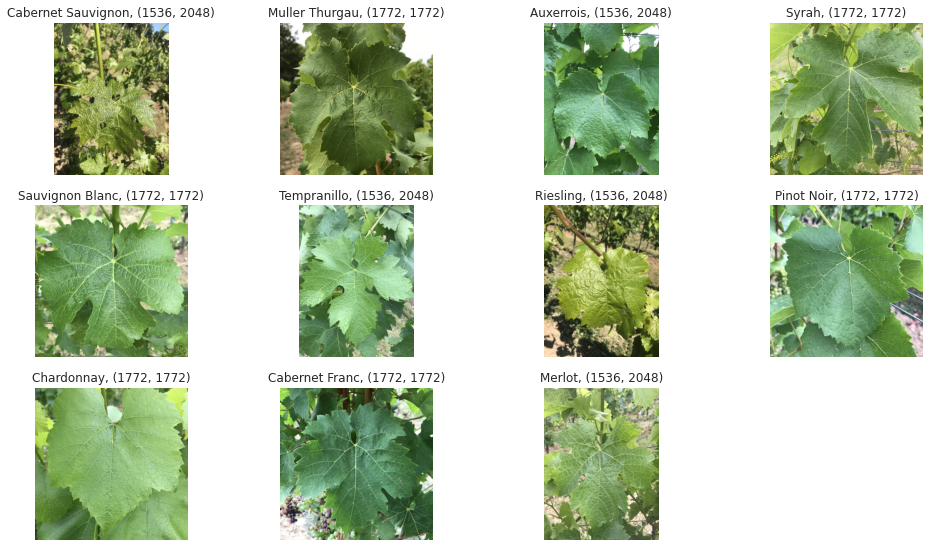

In [ ]:
## Viz Random Sample from each class
plt.figure(figsize=(15, 12))

for i, (cls,img) in enumerate(image_dict.items()): 
    
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [ ]:
# Plotting the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

Count of training samples per class:
                  class  count
0   Cabernet Sauvignon     67
1       Muller Thurgau     73
2            Auxerrois     53
3                Syrah     71
4      Sauvignon Blanc     60
5          Tempranillo     42
6             Riesling     70
7           Pinot Noir     35
8           Chardonnay     62
9       Cabernet Franc     36
10              Merlot     37


<Figure size 1080x864 with 0 Axes>

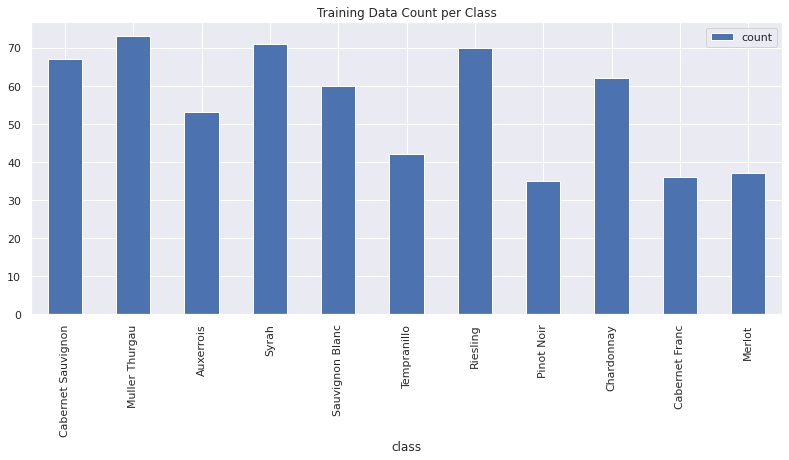

In [ ]:
# plotting by using pandas in-built plotting function
plt.figure(figsize=(15,12))
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per Class") 
plt.show()

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "../content/grapevine-leaves/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "../content/grapevine-leaves/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "../content/grapevine-leaves/test", shuffle = False,
)


Loading Train Data...
Found 606 files belonging to 11 classes.

Loading Validation Data...
Found 202 files belonging to 11 classes.

Loading Test Data...
Found 201 files belonging to 11 classes.


# **Data processing**

* Data Processing Stage with resizing and rescaling operations.
* Perform Data Processing on the train, val, test dataset.

In [ ]:
height, width = 256,256

data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), 
        layers.Rescaling(1.0/255), 
    ]
)

train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
num_classes = 11
hidden_size_1 = 1024
hidden_size_2 = 256

# **Neural Networks (MLP)**

Multi-layer perceptron (MLP) is a supplement of a feed-forward neural network. It consists of three types of layers—the input layer, the output layer, and the hidden. 

In [ ]:
model_ann = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)),
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

In [ ]:
model_ann.summary()

Model: "model_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 1024)              201327616 
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 11)                2827      
                                                                 
Total params: 201,592,843
Trainable params: 201,592,843
Non-trainable params: 0
_________________________________________________________________


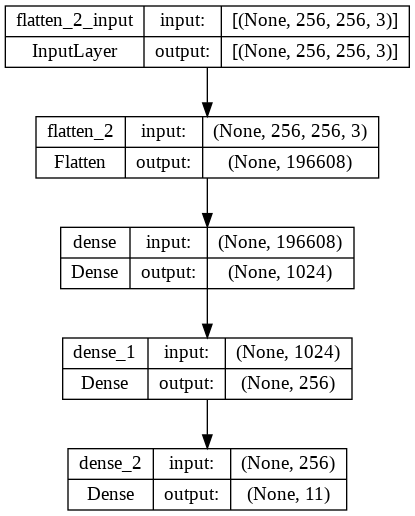

In [ ]:
tf.keras.utils.plot_model(model_ann, to_file="model_ann.png", show_shapes=True)

In [ ]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 25
model_fit = model_ann.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
19/19 [==============================] - 14s 416ms/step - loss: 236.0075 - accuracy: 0.1073 - val_loss: 121.0890 - val_accuracy: 0.1040
Epoch 2/25
19/19 [==============================] - 13s 464ms/step - loss: 71.3423 - accuracy: 0.1056 - val_loss: 57.3203 - val_accuracy: 0.1436
Epoch 3/25
19/19 [==============================] - 13s 468ms/step - loss: 28.1287 - accuracy: 0.1238 - val_loss: 24.7878 - val_accuracy: 0.0792
Epoch 4/25
19/19 [==============================] - 13s 466ms/step - loss: 14.2924 - accuracy: 0.1700 - val_loss: 6.4168 - val_accuracy: 0.2525
Epoch 5/25
19/19 [==============================] - 13s 463ms/step - loss: 5.7674 - accuracy: 0.2888 - val_loss: 4.8303 - val_accuracy: 0.2129
Epoch 6/25
19/19 [==============================] - 13s 467ms/step - loss: 3.3238 - accuracy: 0.3762 - val_loss: 3.6486 - val_accuracy: 0.2426
Epoch 7/25
19/19 [==============================] - 13s 464ms/step - loss: 3.5464 - accuracy: 0.3894 - val_loss: 4.5609 - val_accurac

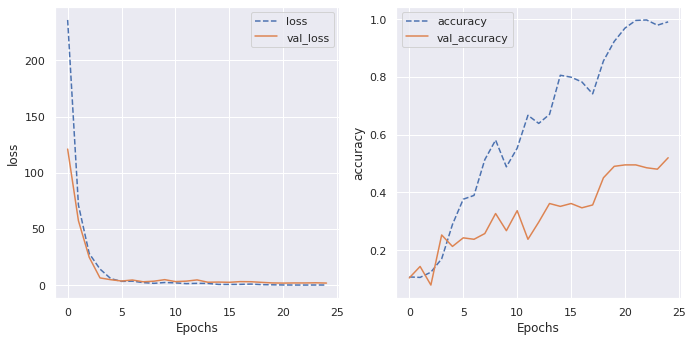

In [ ]:
training_plot(['loss', 'accuracy'], model_fit)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
testAccuracy(model_ann)

7/7 [==============================] - 3s 422ms/step

Test Accuracy: 51.24%



# **Convolutional Neural Network - CNN (Baseline Model)**

The convolutional neural network starts with a separate temporal layer and spatial convolutional layers, followed by a pooling layer.

In [ ]:
model_base_cnn = keras.Sequential(
    name="model_base_cnn",
    layers=[
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=256, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)


In [ ]:
model_base_cnn.summary()

Model: "model_base_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 262144)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               67109120  
                                                                 
 dense_4 (Dense)             (None, 11)                2827      
                                                                 
Total params: 67,112,395
Trainable params: 67,112,395
Non-trainable params: 0
________________________________________

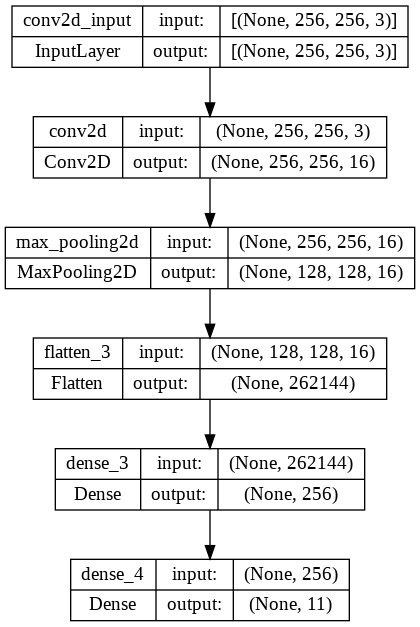

In [ ]:
tf.keras.utils.plot_model(model_base_cnn, to_file="model_cnn.png", show_shapes=True)

In [ ]:
model_base_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 25
model_base_cnn_fit = model_base_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
19/19 [==============================] - 18s 426ms/step - loss: 83.0422 - accuracy: 0.0974 - val_loss: 20.6364 - val_accuracy: 0.0644
Epoch 2/25
19/19 [==============================] - 12s 456ms/step - loss: 11.6443 - accuracy: 0.1419 - val_loss: 5.3284 - val_accuracy: 0.1733
Epoch 3/25
19/19 [==============================] - 12s 458ms/step - loss: 2.5986 - accuracy: 0.3086 - val_loss: 2.2823 - val_accuracy: 0.2376
Epoch 4/25
19/19 [==============================] - 12s 455ms/step - loss: 1.2511 - accuracy: 0.6568 - val_loss: 1.7627 - val_accuracy: 0.4257
Epoch 5/25
19/19 [==============================] - 14s 517ms/step - loss: 0.6504 - accuracy: 0.8680 - val_loss: 1.6161 - val_accuracy: 0.4851
Epoch 6/25
19/19 [==============================] - 13s 464ms/step - loss: 0.2910 - accuracy: 0.9752 - val_loss: 1.4742 - val_accuracy: 0.5198
Epoch 7/25
19/19 [==============================] - 13s 462ms/step - loss: 0.1241 - accuracy: 0.9950 - val_loss: 1.3756 - val_accuracy: 0.5

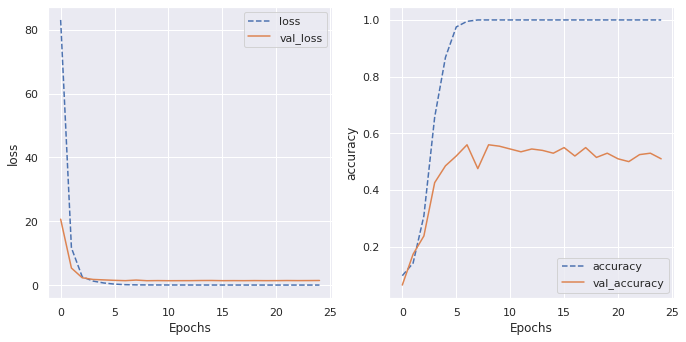

In [ ]:
training_plot(['loss', 'accuracy'], model_base_cnn_fit)


In [ ]:
testAccuracy(model_base_cnn)

7/7 [==============================] - 3s 431ms/step

Test Accuracy: 46.77%



# **Improving Baseline Model**

Create Deeper Model (Adding more convolution and max pooling layers)

In [ ]:
model_impv_cnn = keras.Sequential(
    name="model_impv_cnn_2",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

In [ ]:
model_impv_cnn.summary()

Model: "model_impv_cnn_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                              

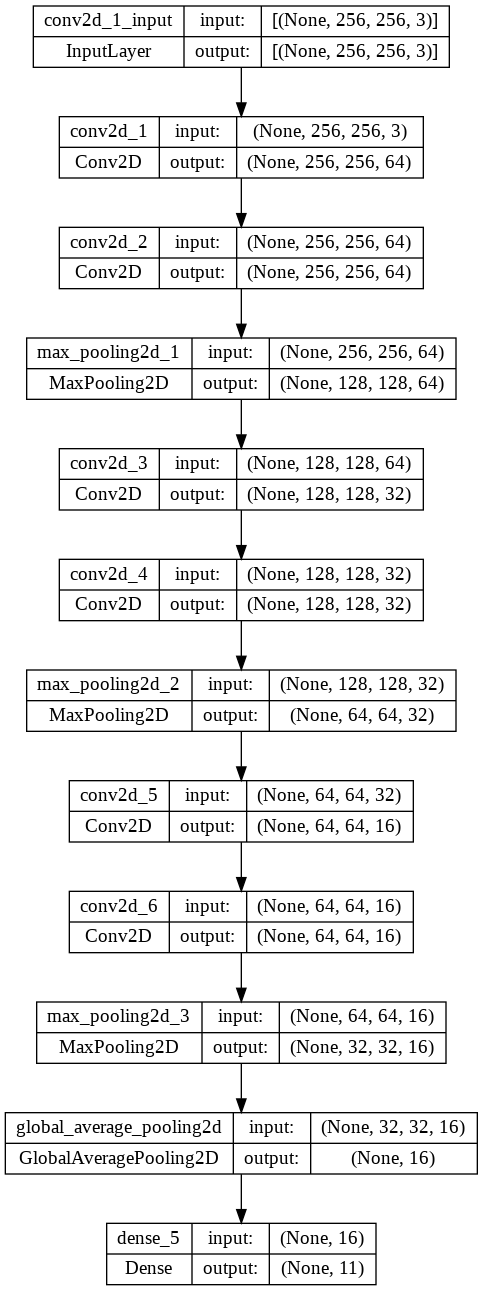

In [ ]:
tf.keras.utils.plot_model(model_impv_cnn, to_file="model_cnn_2.png", show_shapes=True)

In [ ]:
model_impv_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 25
model_fit = model_impv_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
19/19 [==============================] - 23s 715ms/step - loss: 2.3949 - accuracy: 0.1073 - val_loss: 2.3791 - val_accuracy: 0.1188
Epoch 2/25
19/19 [==============================] - 14s 542ms/step - loss: 2.3752 - accuracy: 0.1172 - val_loss: 2.3679 - val_accuracy: 0.1188
Epoch 3/25
19/19 [==============================] - 14s 536ms/step - loss: 2.3591 - accuracy: 0.1172 - val_loss: 2.3566 - val_accuracy: 0.1188
Epoch 4/25
19/19 [==============================] - 15s 541ms/step - loss: 2.3518 - accuracy: 0.1238 - val_loss: 2.3673 - val_accuracy: 0.1782
Epoch 5/25
19/19 [==============================] - 14s 541ms/step - loss: 2.3303 - accuracy: 0.1403 - val_loss: 2.2958 - val_accuracy: 0.1287
Epoch 6/25
19/19 [==============================] - 14s 535ms/step - loss: 2.2713 - accuracy: 0.1436 - val_loss: 2.2737 - val_accuracy: 0.1386
Epoch 7/25
19/19 [==============================] - 14s 538ms/step - loss: 2.2580 - accuracy: 0.1551 - val_loss: 2.2469 - val_accuracy: 0.1584

In [ ]:
testAccuracy(model_impv_cnn)

7/7 [==============================] - 4s 516ms/step

Test Accuracy: 20.40%



# **Further Improving the Baseline Model**

Reducing the overfitting of the model by using BatchNormalization and Dropout layers and Adding Global Average Pooling instead of Flatten layer.

In [ ]:
model_bndr_cnn = keras.Sequential(
    name="model_cnn_4",
    layers=[
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.25),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)


In [ ]:
model_bndr_cnn.summary()

Model: "model_cnn_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      

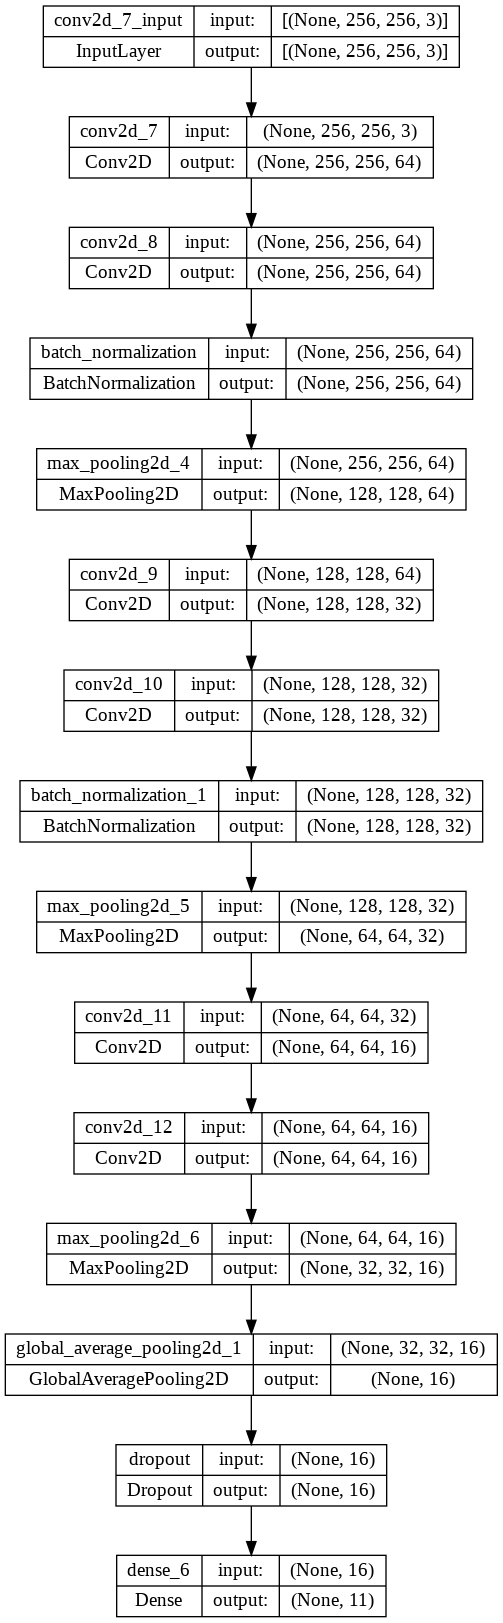

In [ ]:
tf.keras.utils.plot_model(model_bndr_cnn, to_file="model_cnn_3.png", show_shapes=True)

In [ ]:
model_bndr_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 25
model_bndr_cnn_fit = model_bndr_cnn.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/25
19/19 [==============================] - 18s 683ms/step - loss: 2.4169 - accuracy: 0.1568 - val_loss: 2.3849 - val_accuracy: 0.0891
Epoch 2/25
19/19 [==============================] - 15s 568ms/step - loss: 2.2804 - accuracy: 0.1601 - val_loss: 2.3676 - val_accuracy: 0.1089
Epoch 3/25
19/19 [==============================] - 15s 563ms/step - loss: 2.2365 - accuracy: 0.2277 - val_loss: 2.3367 - val_accuracy: 0.1337
Epoch 4/25
19/19 [==============================] - 15s 560ms/step - loss: 2.2363 - accuracy: 0.2426 - val_loss: 2.3619 - val_accuracy: 0.1188
Epoch 5/25
19/19 [==============================] - 17s 688ms/step - loss: 2.1886 - accuracy: 0.2129 - val_loss: 2.3392 - val_accuracy: 0.1485
Epoch 6/25
19/19 [==============================] - 15s 559ms/step - loss: 2.1836 - accuracy: 0.2393 - val_loss: 2.3098 - val_accuracy: 0.1634
Epoch 7/25
19/19 [==============================] - 16s 617ms/step - loss: 2.1745 - accuracy: 0.2228 - val_loss: 2.4255 - val_accuracy: 0.1683

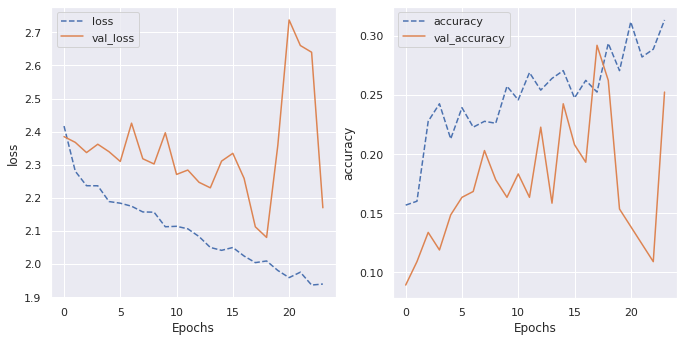

In [ ]:
training_plot(['loss', 'accuracy'], model_bndr_cnn_fit)

In [ ]:
testAccuracy(model_bndr_cnn)

7/7 [==============================] - 4s 571ms/step

Test Accuracy: 23.88%



# **Transfer Learning Using CNN (VGG16)**

VGG16 is a convolutional neural network trained on a subset of the ImageNet dataset.

In [ ]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 15)                975       
                                                                 
Total params: 14,748,495
Trainable params: 33,807
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vgg16_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_vgg16 = vgg16_model.fit(train_ds, epochs=50, validation_data=val_ds,callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/50
19/19 [==============================] - 20s 693ms/step - loss: 2.6280 - accuracy: 0.0644 - val_loss: 2.4864 - val_accuracy: 0.0891
Epoch 2/50
19/19 [==============================] - 14s 541ms/step - loss: 2.4166 - accuracy: 0.1353 - val_loss: 2.3700 - val_accuracy: 0.1881
Epoch 3/50
19/19 [==============================] - 15s 601ms/step - loss: 2.3150 - accuracy: 0.1964 - val_loss: 2.2942 - val_accuracy: 0.2030
Epoch 4/50
19/19 [==============================] - 14s 541ms/step - loss: 2.2597 - accuracy: 0.2624 - val_loss: 2.2438 - val_accuracy: 0.2673
Epoch 5/50
19/19 [==============================] - 15s 595ms/step - loss: 2.1969 - accuracy: 0.2871 - val_loss: 2.1984 - val_accuracy: 0.4158
Epoch 6/50
19/19 [==============================] - 16s 645ms/step - loss: 2.1377 - accuracy: 0.3861 - val_loss: 2.1545 - val_accuracy: 0.2871
Epoch 7/50
19/19 [==============================] - 14s 549ms/step - loss: 2.0805 - accuracy: 0.3713 - val_loss: 2.1091 - val_accuracy: 0.4406

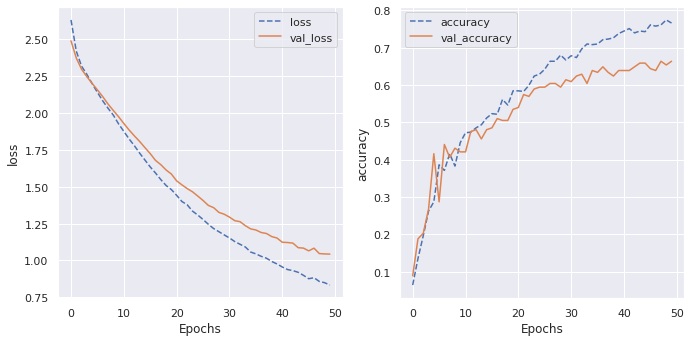

In [ ]:
training_plot(['loss', 'accuracy'], history_vgg16)

In [ ]:
testAccuracy(vgg16_model)

7/7 [==============================] - 5s 649ms/step

Test Accuracy: 65.17%



# **Resnet**

A residual neural network (ResNet) is an artificial neural network (ANN).

In [ ]:
pretrained_resnet_model = tf.keras.applications.ResNet50V2(weights='imagenet',
                         include_top=False,
                         input_tensor = (tf.keras.layers.Input(shape=(height,width,3)))
                         )
pretrained_resnet_model.trainable=False
resnet_model = tf.keras.Sequential([
    pretrained_resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(15, activation='softmax')
])

94668760/94668760 [==============================] - 0s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 15)                30735     
                                                                 
Total params: 23,595,535
Trainable params: 30,735
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_resnet = resnet_model.fit(train_ds, epochs=25, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/25
19/19 [==============================] - 20s 643ms/step - loss: 2.4483 - accuracy: 0.1832 - val_loss: 2.0613 - val_accuracy: 0.3465
Epoch 2/25
19/19 [==============================] - 14s 514ms/step - loss: 1.7600 - accuracy: 0.4785 - val_loss: 1.7228 - val_accuracy: 0.5050
Epoch 3/25
19/19 [==============================] - 15s 565ms/step - loss: 1.4221 - accuracy: 0.6584 - val_loss: 1.5198 - val_accuracy: 0.5693
Epoch 4/25
19/19 [==============================] - 13s 501ms/step - loss: 1.1962 - accuracy: 0.7112 - val_loss: 1.3821 - val_accuracy: 0.6238
Epoch 5/25
19/19 [==============================] - 14s 555ms/step - loss: 1.0373 - accuracy: 0.7805 - val_loss: 1.2739 - val_accuracy: 0.6139
Epoch 6/25
19/19 [==============================] - 13s 504ms/step - loss: 0.9162 - accuracy: 0.8317 - val_loss: 1.1938 - val_accuracy: 0.6634
Epoch 7/25
19/19 [==============================] - 15s 565ms/step - loss: 0.8281 - accuracy: 0.8581 - val_loss: 1.1268 - val_accuracy: 0.6782

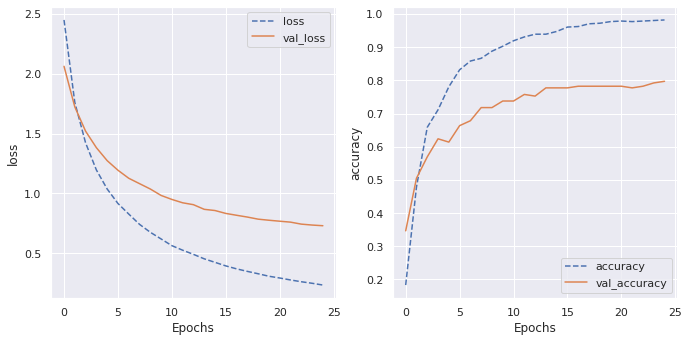

In [ ]:
training_plot(['loss', 'accuracy'], history_resnet)

In [ ]:
testAccuracy(resnet_model)

7/7 [==============================] - 5s 558ms/step

Test Accuracy: 76.62%



# **MobileNet**

MobileNet-v2 is a convolutional neural network that is 53 layers deep.

In [ ]:
pretrained_mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=[height,width, 3])
pretrained_mobilenet_model.trainable=False
mobilenet_model = tf.keras.Sequential([
    pretrained_mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(15, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
mobilenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 15)                19215     
                                                                 
Total params: 2,277,199
Trainable params: 19,215
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history_mobilenet = mobilenet_model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/10
19/19 [==============================] - 18s 597ms/step - loss: 2.4163 - accuracy: 0.1799 - val_loss: 2.0308 - val_accuracy: 0.3119
Epoch 2/10
19/19 [==============================] - 13s 467ms/step - loss: 1.6649 - accuracy: 0.4505 - val_loss: 1.6339 - val_accuracy: 0.4356
Epoch 3/10
19/19 [==============================] - 14s 534ms/step - loss: 1.2595 - accuracy: 0.6353 - val_loss: 1.3606 - val_accuracy: 0.5891
Epoch 4/10
19/19 [==============================] - 13s 473ms/step - loss: 1.0205 - accuracy: 0.7442 - val_loss: 1.1941 - val_accuracy: 0.6386
Epoch 5/10
19/19 [==============================] - 14s 480ms/step - loss: 0.8633 - accuracy: 0.8069 - val_loss: 1.0877 - val_accuracy: 0.6782
Epoch 6/10
19/19 [==============================] - 13s 474ms/step - loss: 0.7504 - accuracy: 0.8366 - val_loss: 1.0213 - val_accuracy: 0.6931
Epoch 7/10
19/19 [==============================] - 13s 471ms/step - loss: 0.6561 - accuracy: 0.8663 - val_loss: 0.9337 - val_accuracy: 0.6980

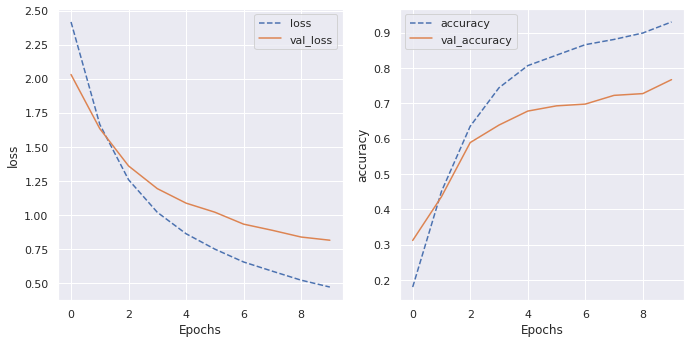

In [ ]:
training_plot(['loss', 'accuracy'], history_mobilenet)

In [ ]:
testAccuracy(mobilenet_model)

7/7 [==============================] - 4s 489ms/step

Test Accuracy: 79.10%



# **Checking Predictions with the best models -**

* ResNet
* MobileNet

7/7 [==============================] - 3s 446ms/step


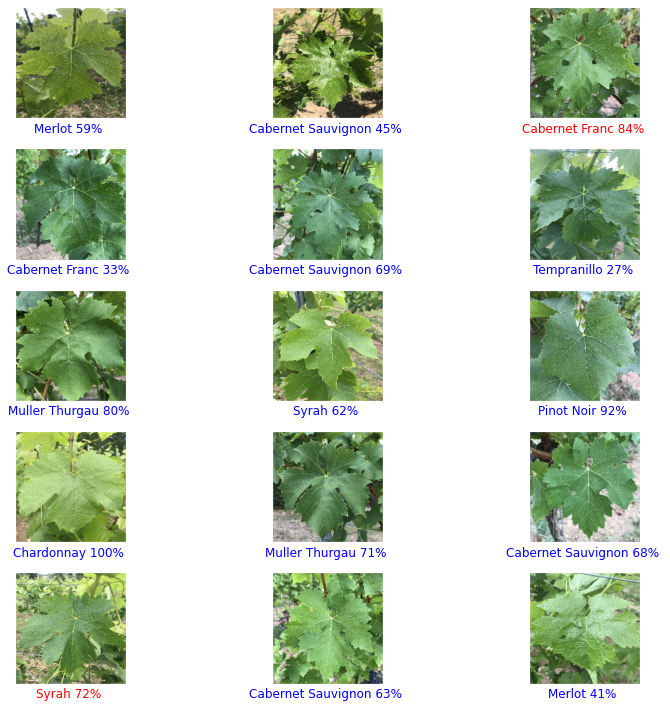

In [ ]:
predictions(resnet_model)

7/7 [==============================] - 3s 438ms/step


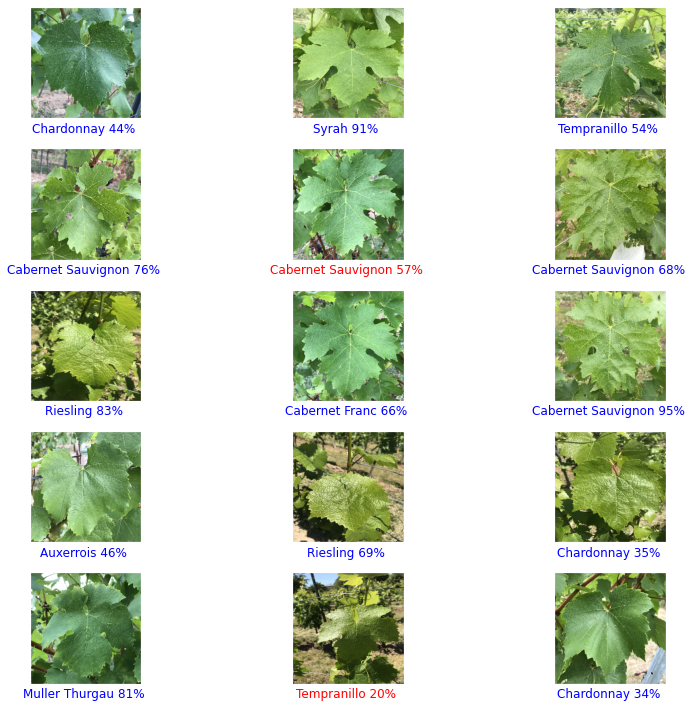

In [ ]:
predictions(mobilenet_model)

# **Using Data Augmentation**

## **Define a Data Augmentation Stage to Add to an Image Model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

## **Displaying some Randomly Augmented Training Images**

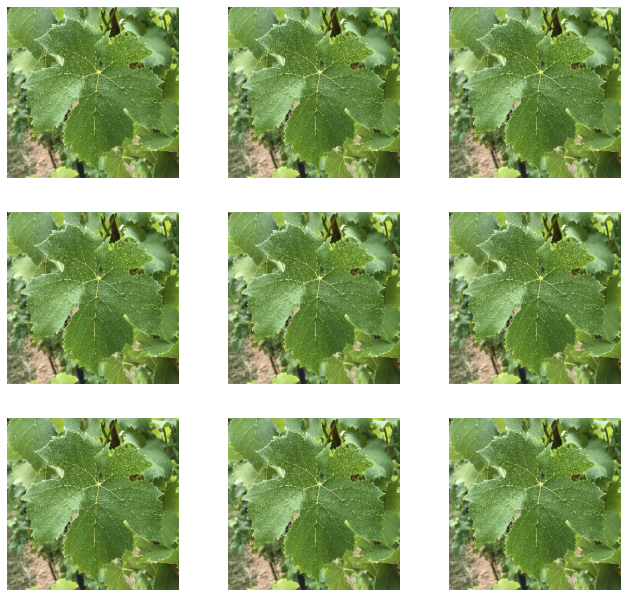

In [ ]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## **Defining a New Convnet that includes Image Augmentation and Dropout**

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

## **Training the Regularized Convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=callbacks)

Epoch 1/50
19/19 [==============================] - 18s 561ms/step - loss: -229906176.0000 - accuracy: 0.0578 - val_loss: -1811458048.0000 - val_accuracy: 0.0594
Epoch 2/50
19/19 [==============================] - 13s 487ms/step - loss: -14636695552.0000 - accuracy: 0.0594 - val_loss: -47625445376.0000 - val_accuracy: 0.0594
Epoch 3/50
19/19 [==============================] - 13s 489ms/step - loss: -135530061824.0000 - accuracy: 0.0594 - val_loss: -297809739776.0000 - val_accuracy: 0.0594
Epoch 4/50
19/19 [==============================] - 15s 509ms/step - loss: -568334155776.0000 - accuracy: 0.0594 - val_loss: -1036339904512.0000 - val_accuracy: 0.0594
Epoch 5/50
19/19 [==============================] - 13s 494ms/step - loss: -1751781605376.0000 - accuracy: 0.0594 - val_loss: -2889417752576.0000 - val_accuracy: 0.0594
Epoch 6/50
19/19 [==============================] - 14s 554ms/step - loss: -4332109168640.0000 - accuracy: 0.0594 - val_loss: -6616490967040.0000 - val_accuracy: 0.0594


## **Evaluating the Model on the Test Set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 4s 567ms/step - loss: -260534416982409216.0000 - accuracy: 0.0597
Test accuracy: 0.060
